First five rows of the dataset
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

<ipython-input-9-db4a0938082d>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].median(), inplace=True)


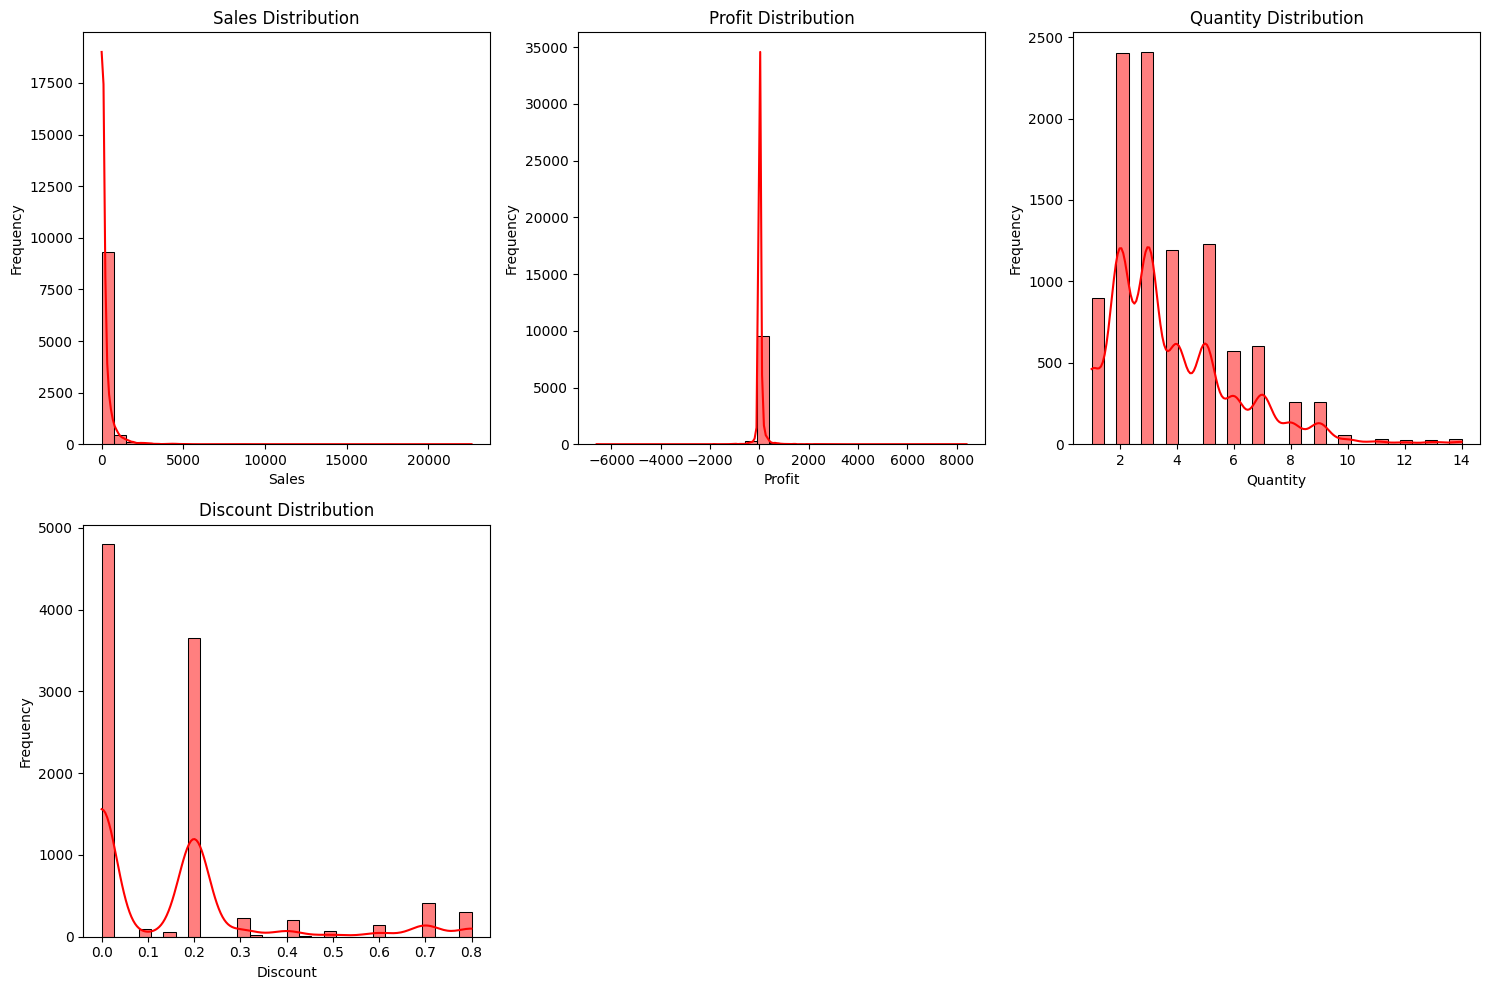


Boxplots:


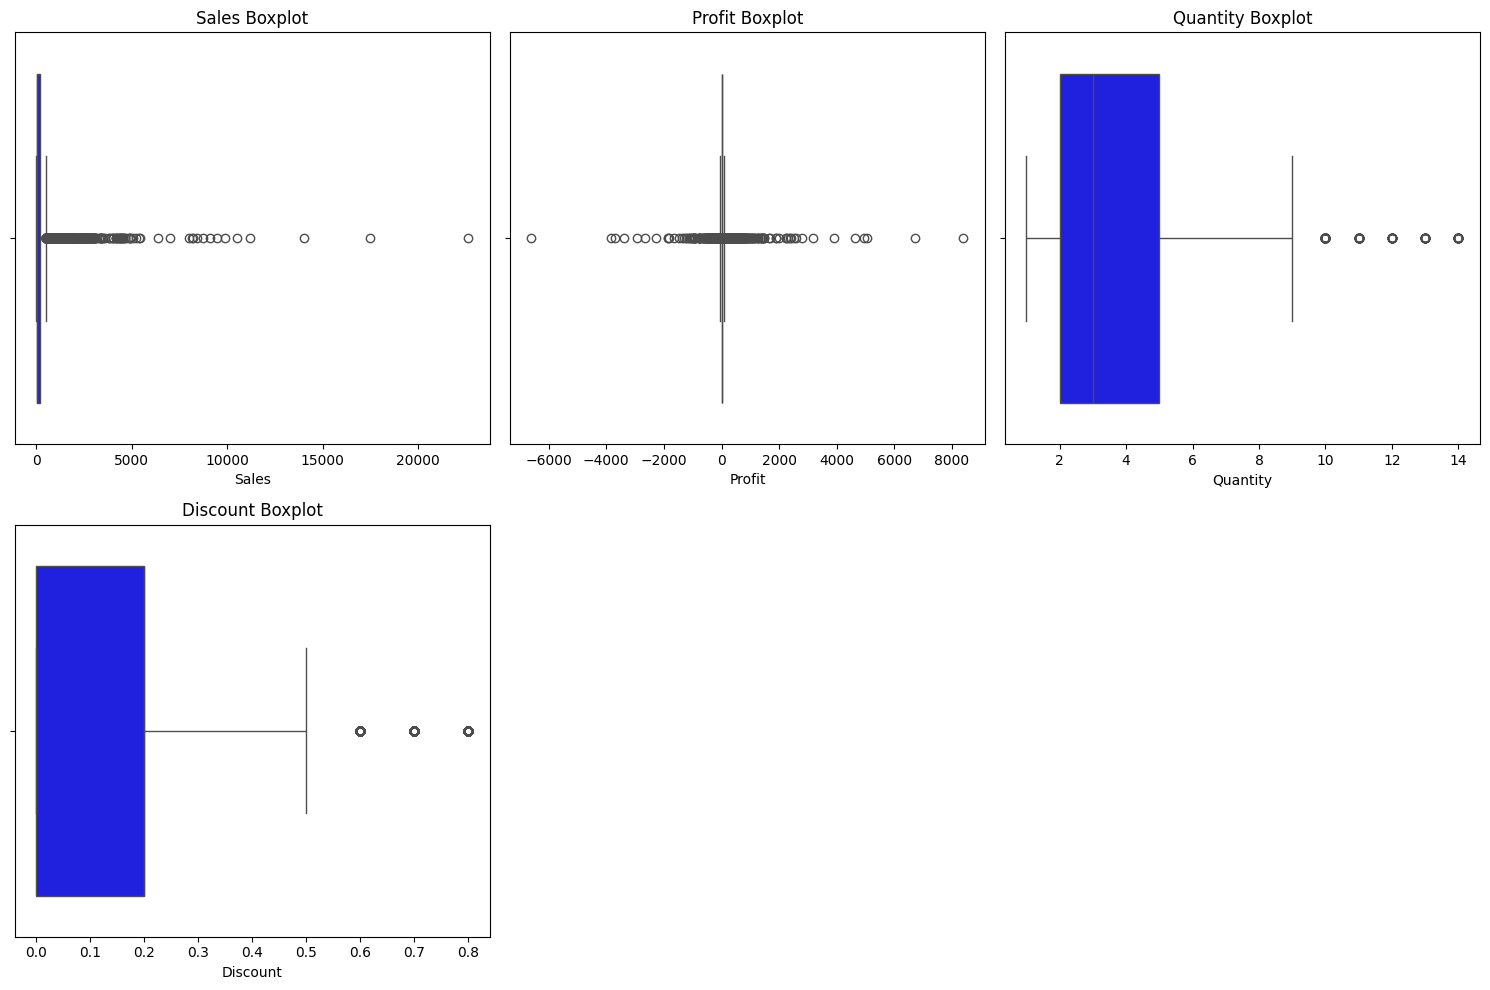


Heatmap:


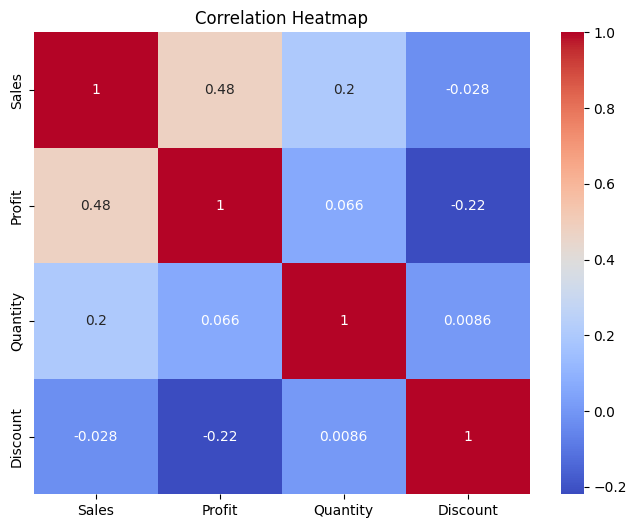

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Superstore.csv", encoding='latin1')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Display the first few rows
print("First five rows of the dataset")
print(df.head())

# Information of the dataset
print("\nDataset Information : ")
print(df.info())

# Summary Statistics
print("\nStatistical Summary : ")
print(df.describe())

# Check for Duplicates
print("\nNumber of duplicate rows : ", df.duplicated().sum())

# Remove the duplicates if any
df = df.drop_duplicates()

# Check or handle missing values
print("\nMissing values before cleaning :\n", df.isnull().sum())

# Fill missing values if 'Postal Code' exists
if 'Postal Code' in df.columns:
    df['Postal Code'].fillna(df['Postal Code'].median(), inplace=True)

print("\nMissing values after cleaning :\n", df.isnull().sum())

# Statistical analysis
cols_to_analyze = ['Sales', 'Profit', 'Quantity', 'Discount']
if 'Shipping Cost' in df.columns:
    cols_to_analyze.append('Shipping Cost')

print("\nMean:\n", df[cols_to_analyze].mean())
print("\nMedian:\n", df[cols_to_analyze].median())
print("\nStandard Deviation:\n", df[cols_to_analyze].std())

# Correlation matrix
correlation = df[cols_to_analyze].corr()
print("\nCorrelation Matrix:\n", correlation)

# ================== Data Visualization ==================
# 1. Histograms for Numerical Data
print("\nHistograms:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='red')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Boxplots
print("\nBoxplots:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 3. Heatmap
print("\nHeatmap:")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Project 2 : 
First 5 rows of the dataset : 
   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-

<ipython-input-4-6b4b1e50e356>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(df["Postal Code"].mean(),inplace=True)


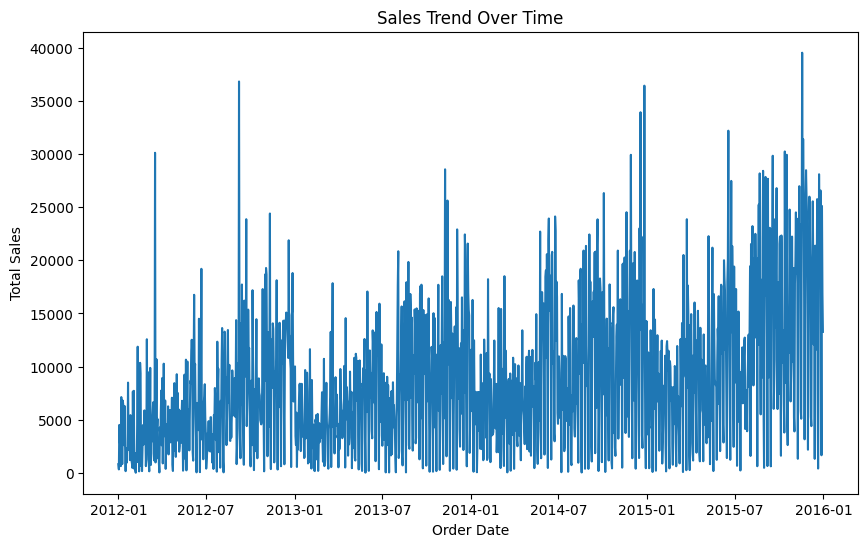


Scatterplot : Profit vs Discount : 


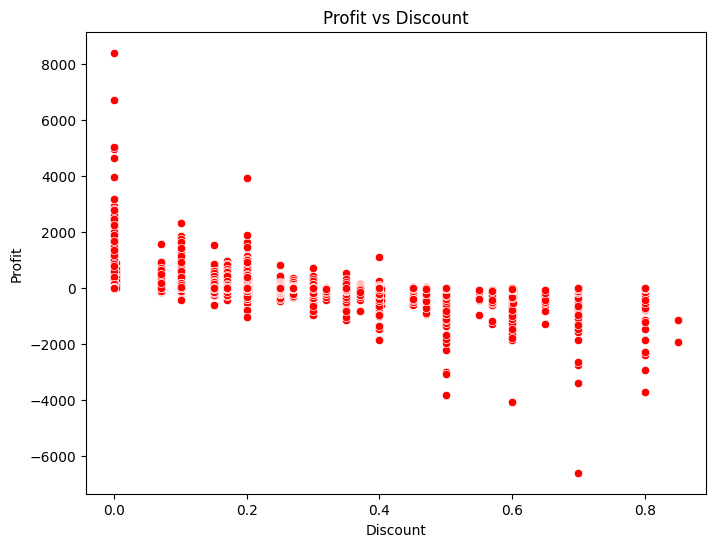


Sales Distribution by Region : 


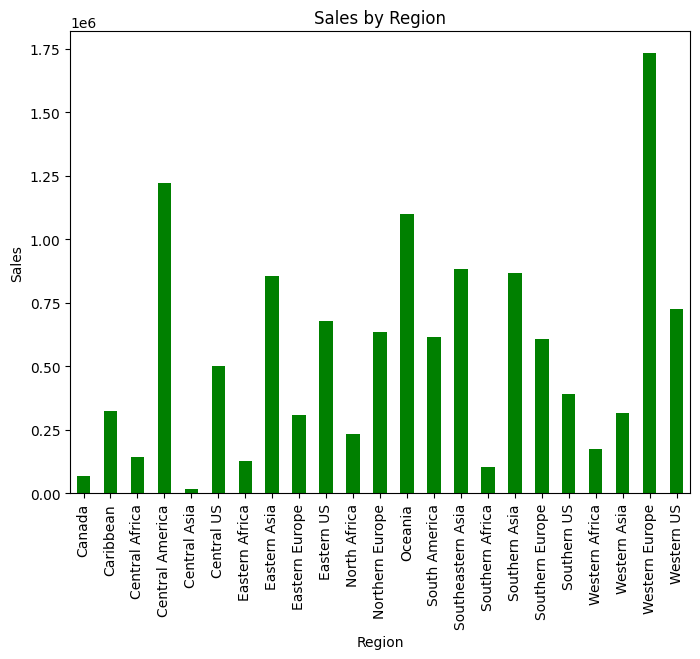


Sales distribution by Category : 


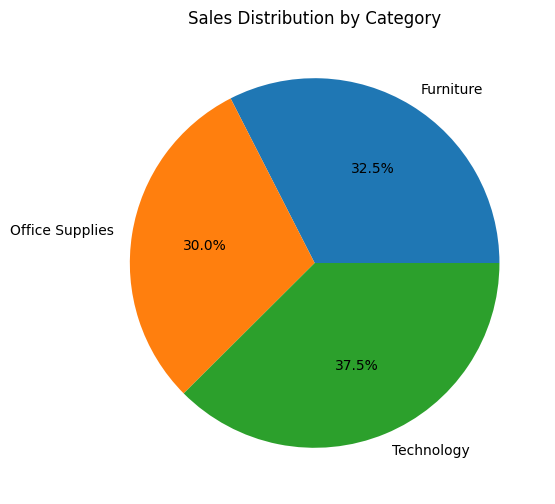

R² Score: 0.2042
Mean Squared Error: 243217.40


In [4]:
# Project 2
print("Project 2 : ")

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/sale_data.xlsx")

# Display the dataset structure
# Display the first few rows
print("First 5 rows of the dataset : ")
print(df.head())

# Information about the dataset
print("\nDataset Information")
print(df.info())

# Shape of a dataset
print("\nShape of the dataset : ")
print(df.shape)

# Datatypes of the dataset
print("\nDatatypes of the dataset")
print(df.dtypes)

# Data Cleaning
 # Check for duplicates
print("\nNo of duplicate rows : ",df.duplicated().sum())
 # Remove duplicates
df = df.drop_duplicates()

 # Handle missing values
print("\nMissing values before cleaning : \n",df.isnull().sum())
 # FIll missing values with column mean
df["Postal Code"].fillna(df["Postal Code"].mean(),inplace=True)

print("\nMissing values after after cleaning : \n",df.isnull().sum())

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Verify the changes
print("\nData after Cleaning : ")
print(df.head())

# Exploratory Data analysis
# Plot sales trends over time
print("\nPlot sales trends over time : ")
df = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Order Date', y='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

# Scatterplot : Profit vs Discount
print("\nScatterplot : Profit vs Discount : ")
df = pd.read_excel("/content/sale_data.xlsx")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', color='red')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Sales Distribution by Region
print("\nSales Distribution by Region : ")
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()

# Sales distribution by Category
print("\nSales distribution by Category : ")
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()



# Predictive Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_excel("/content/sale_data.xlsx")

# Select features and target
x = df[['Profit', 'Discount']]
y = df['Sales']

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and Evaluate
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')